In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist = datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
cv2_imshow(train_images[0])


In [ ]:
import cv2

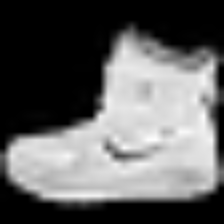

In [ ]:
cv2_imshow(cv2.resize(train_images[0],(0,0),fx=8,fy=8))

In [ ]:
train_labels[0]

9

In [ ]:
class_names[train_labels[0]]

'Ankle boot'

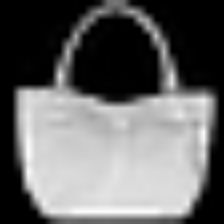

'Bag'

In [ ]:
cv2_imshow(cv2.resize(train_images[100],(0,0),fx=8,fy=8))
class_names[train_labels[100]]

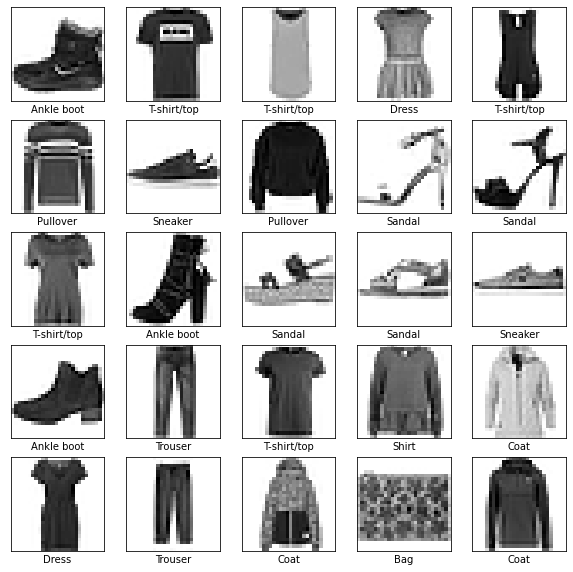

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = models.Sequential()
# ...

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [ ]:
# dense

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
#complie

In [ ]:
#fit
# history = model.fit ...

Epoch 1/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.4568 - accuracy: 0.8517 - val_loss: 0.3218 - val_accuracy: 0.8860
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2832 - accuracy: 0.8968 - val_loss: 0.3328 - val_accuracy: 0.8810
Epoch 3/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2521 - accuracy: 0.9072 - val_loss: 0.2782 - val_accuracy: 0.8994
Epoch 4/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2270 - accuracy: 0.9157 - val_loss: 0.2849 - val_accuracy: 0.9001
Epoch 5/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.2082 - accuracy: 0.9226 - val_loss: 0.2735 - val_accuracy: 0.9040
Epoch 6/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1947 - accuracy: 0.9273 - val_loss: 0.2752 - val_accuracy: 0.9098
Epoch 7/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1785 - accuracy: 0.9327 - val_loss: 0

313/313 - 4s - loss: 0.3158 - accuracy: 0.9059 - 4s/epoch - 14ms/step

Test accuracy: 0.9059000015258789


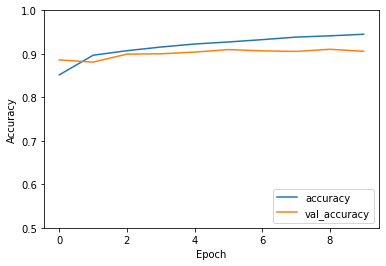

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)


In [ ]:
predictions[0]


array([1.4820869e-16, 1.1880026e-19, 4.8849685e-22, 1.1630729e-23,
       8.9564496e-25, 3.2865601e-09, 2.3377764e-17, 2.5612177e-08,
       5.4048452e-19, 1.0000000e+00], dtype=float32)

In [ ]:
predictions[0].sum()


1.0

In [ ]:
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]


9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

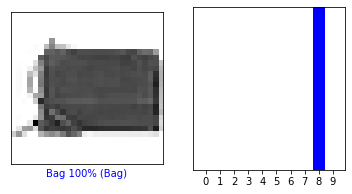

In [ ]:
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

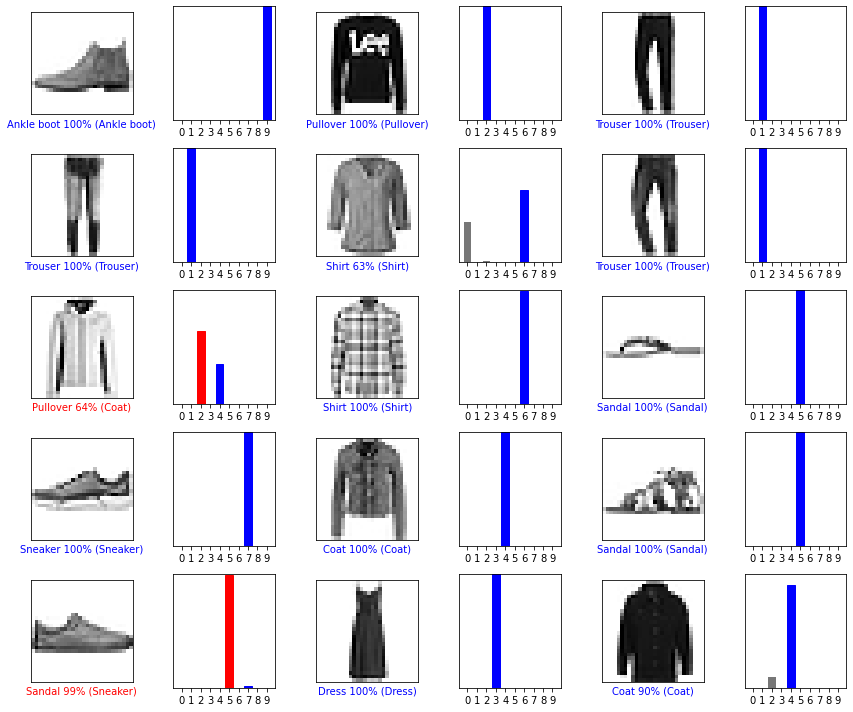

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
bag = cv2.imread('bag.jpg',0)

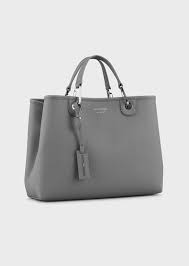

In [ ]:
cv2_imshow(bag)

In [ ]:
new_test = cv2.resize(bag,(28,28))

In [ ]:
print(new_test)

[[235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 235 235 234 232 235 235 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 238 133 232 232  87 239 235
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 235 235 127 219 235 237  88 219 233
  235 235 235 235 235 235 235 235 235 235]
 [235 235 235 235 235 235 235 235 235 238 177 141 237 235 235 16

In [ ]:
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [ ]:
cv2_imshow(new_test)

In [ ]:
cv2_imshow(test_images[0])

In [ ]:
cv2_imshow(cv2.bitwise_not(test_images[0]))

In [ ]:
cv2_imshow(cv2.bitwise_not(new_test))

In [ ]:
print(type(test_images))
print(test_images.shape)
print(type(new_test))
print(new_test.shape)
new_predictions = probability_model.predict(cv2.bitwise_not(new_test).reshape(1,28,28))

<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(28, 28)


In [ ]:
new_predictions[0]

array([5.0391068e-06, 4.2700726e-10, 1.2182114e-05, 7.7392252e-11,
       4.9255171e-08, 8.5952001e-05, 8.9467067e-06, 8.6857101e-05,
       9.9976593e-01, 3.4996519e-05], dtype=float32)

In [ ]:
np.argmax(new_predictions)

8

In [ ]:
class_names[np.argmax(new_predictions)]

'Bag'

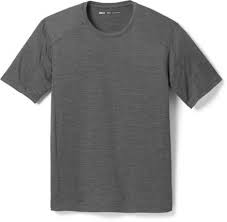

In [ ]:
shirt = cv2.imread('Tshirt.jpg',0)
cv2_imshow(shirt)

In [ ]:
new_test2 = cv2.resize(shirt,(28,28))

In [ ]:
new_predictions = probability_model.predict(cv2.bitwise_not(new_test2).reshape(1,28,28))
class_names[np.argmax(new_predictions[0])]

'T-shirt/top'

In [ ]:
new_predictions[0]

array([2.7064831e-04, 5.0732041e-08, 2.8194296e-03, 1.2145457e-04,
       8.3191586e-01, 1.5459593e-12, 1.6485812e-01, 6.2897236e-16,
       1.4377745e-05, 2.7798328e-12], dtype=float32)

In [ ]:
cv2_imshow(cv2.bitwise_not(new_test2))

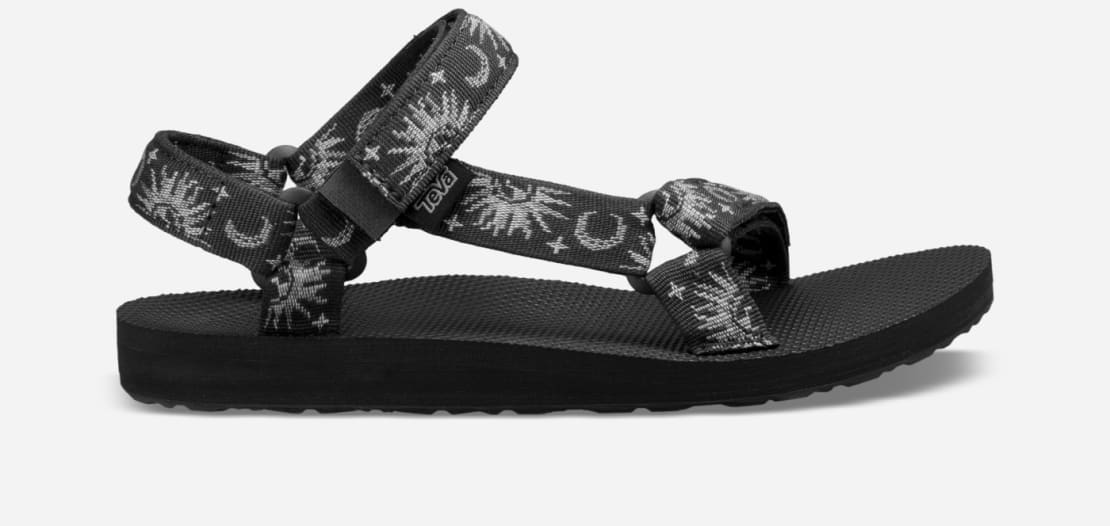

Bag


In [ ]:
sandal = cv2.imread('sandal.jpg',0)
cv2_imshow(sandal)
new_test3 = cv2.resize(sandal,(28,28))
new_predictions = probability_model.predict(cv2.bitwise_not(new_test3).reshape(1,28,28))
print(class_names[np.argmax(new_predictions[0])])
cv2_imshow(cv2.bitwise_not(new_test3))